**Analisis Pengaruh Penggunaan *Device* Saat
Pembelajaran Daring Terhadap Kelelahan Fisik
Mahasiswa Indonesia**

Kelas : Analitik Visualisasi Data C

Oleh Kelompok C7 :

202410101001 - Lilik Dwi Wulandari

202410101003 - Raihan Maulana Ramadhan

202410101025 - Gusti Ayu Chairunnisa

202410101037 - Anita Silvia Budiarti

202410101057 - Muhammad Hidayatur Rahman

#Pra pemrosesan data

##Read Dataset

In [ ]:
import pandas as pd

In [ ]:
data_path = '/content/ZoomFatigue.csv'
loan_data = pd.read_csv(data_path, sep=';')
loan_data

,jenis_kelamin,avg_usage,device,screen,with_desk,with_sofa,on_floor,lay_low,mobile,audio_device,limit,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,"5,5",Handphone,"6,5",2,3,4,5,1,Headset,2,1,1,1,0,0,0
1,0,5,Handphone,"5,99",5,3,4,1,2,Headset,2,1,0,1,1,1,0
2,0,9,Laptop,"15,6",3,4,5,1,2,built in speaker,"2,5",1,1,0,1,1,0
3,1,5,Laptop,14,5,2,1,4,3,Earphone,1,0,1,0,0,0,0
4,0,2,Laptop,14,4,3,5,2,1,Earphone,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,5,Laptop,13,4,3,1,5,2,Headset,1,1,1,0,1,1,0
284,0,5,Komputer Desktop,23,5,1,2,3,4,built in speaker,1,0,1,0,1,0,0
285,0,7,Laptop,14,5,2,3,4,1,Earphone,2,1,1,0,1,1,1
286,1,4,Laptop,13,5,4,3,2,1,Earphone,"1,5",1,1,0,1,1,0


In [ ]:
for i in loan_data.columns:
  print(i)

jenis_kelamin
avg_usage
device
screen
with_desk
with_sofa
on_floor
lay_low
mobile
audio_device
limit
is_mata_lelah
is_pegal_pinggang
is_kesemutan
is_pegal_leher
is_sakit_kepala
is_pegal_jari


##Deteksi NaN Kolom

In [ ]:
is_na = loan_data.isna().any(axis=0)
is_na

jenis_kelamin        False
avg_usage            False
device               False
screen               False
with_desk            False
with_sofa            False
on_floor             False
lay_low              False
mobile               False
audio_device         False
limit                False
is_mata_lelah        False
is_pegal_pinggang    False
is_kesemutan         False
is_pegal_leher       False
is_sakit_kepala      False
is_pegal_jari        False
dtype: bool

Tidak ditemukan kolom yang mengandung nilai NaN

##Delete Duplicate data

In [ ]:
zoom_duplicated_free = loan_data.drop_duplicates()

In [ ]:
zoom_duplicated_free

,jenis_kelamin,avg_usage,device,screen,with_desk,with_sofa,on_floor,lay_low,mobile,audio_device,limit,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,"5,5",Handphone,"6,5",2,3,4,5,1,Headset,2,1,1,1,0,0,0
1,0,5,Handphone,"5,99",5,3,4,1,2,Headset,2,1,0,1,1,1,0
2,0,9,Laptop,"15,6",3,4,5,1,2,built in speaker,"2,5",1,1,0,1,1,0
3,1,5,Laptop,14,5,2,1,4,3,Earphone,1,0,1,0,0,0,0
4,0,2,Laptop,14,4,3,5,2,1,Earphone,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,5,Laptop,13,4,3,1,5,2,Headset,1,1,1,0,1,1,0
284,0,5,Komputer Desktop,23,5,1,2,3,4,built in speaker,1,0,1,0,1,0,0
285,0,7,Laptop,14,5,2,3,4,1,Earphone,2,1,1,0,1,1,1
286,1,4,Laptop,13,5,4,3,2,1,Earphone,"1,5",1,1,0,1,1,0


##Reduksi Data

###Drop Unused Column 

In [ ]:
new_data = zoom_duplicated_free.drop(['screen','with_desk','with_sofa','on_floor','lay_low','mobile','audio_device','limit'], axis=1)
new_data

,jenis_kelamin,avg_usage,device,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,"5,5",Handphone,1,1,1,0,0,0
1,0,5,Handphone,1,0,1,1,1,0
2,0,9,Laptop,1,1,0,1,1,0
3,1,5,Laptop,0,1,0,0,0,0
4,0,2,Laptop,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
283,1,5,Laptop,1,1,0,1,1,0
284,0,5,Komputer Desktop,0,1,0,1,0,0
285,0,7,Laptop,1,1,0,1,1,1
286,1,4,Laptop,1,1,0,1,1,0


###Convert column 'device' to int64

In [ ]:
new_data['avg_usage'] = pd.to_numeric(new_data['avg_usage'],errors='coerce')

In [ ]:
code = 1
for i in new_data.loc[:,'device'].unique():
  new_data['device'].loc[new_data['device']==i] = code
  code += 1
new_data['device'] = new_data['device'].astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
new_data

,jenis_kelamin,avg_usage,device,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,NaN,1,1,1,1,0,0,0
1,0,5.0,1,1,0,1,1,1,0
2,0,9.0,2,1,1,0,1,1,0
3,1,5.0,2,0,1,0,0,0,0
4,0,2.0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
283,1,5.0,2,1,1,0,1,1,0
284,0,5.0,3,0,1,0,1,0,0
285,0,7.0,2,1,1,0,1,1,1
286,1,4.0,2,1,1,0,1,1,0


In [ ]:
new_data = new_data[['jenis_kelamin','avg_usage','is_mata_lelah','is_pegal_pinggang','is_kesemutan','is_pegal_leher','is_sakit_kepala','is_pegal_jari','device']]
new_data

,jenis_kelamin,avg_usage,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari,device
0,0,NaN,1,1,1,0,0,0,1
1,0,5.0,1,0,1,1,1,0,1
2,0,9.0,1,1,0,1,1,0,2
3,1,5.0,0,1,0,0,0,0,2
4,0,2.0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
283,1,5.0,1,1,0,1,1,0,2
284,0,5.0,0,1,0,1,0,0,3
285,0,7.0,1,1,0,1,1,1,2
286,1,4.0,1,1,0,1,1,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler

zoom_standarded = StandardScaler().fit_transform(new_data.iloc[:,:8])
zoom_standarded = pd.DataFrame(zoom_standarded)
zoom_standarded = pd.concat([zoom_standarded, new_data['jenis_kelamin']], ignore_index=True, axis=1)
zoom_standarded.columns = new_data.columns
zoom_standarded

,jenis_kelamin,avg_usage,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari,device
0,-0.502169,NaN,0.491304,0.572004,0.932808,-1.459601,-0.979379,-0.485851,0
1,-0.502169,-0.521509,0.491304,-1.748239,0.932808,0.685119,1.021055,-0.485851,0
2,-0.502169,1.271308,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,0
3,1.991361,-0.521509,-2.035401,0.572004,-1.072033,-1.459601,-0.979379,-0.485851,1
4,-0.502169,-1.866121,-2.035401,-1.748239,0.932808,-1.459601,-0.979379,-0.485851,0
...,...,...,...,...,...,...,...,...,...
283,1.991361,-0.521509,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,1
284,-0.502169,-0.521509,-2.035401,0.572004,-1.072033,0.685119,-0.979379,-0.485851,0
285,-0.502169,0.374900,0.491304,0.572004,-1.072033,0.685119,1.021055,2.058243,0
286,1.991361,-0.969713,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,1


In [ ]:
x = zoom_standarded.dropna(axis=0, how='any')
x

,jenis_kelamin,avg_usage,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari,device
1,-0.502169,-0.521509,0.491304,-1.748239,0.932808,0.685119,1.021055,-0.485851,0
2,-0.502169,1.271308,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,0
3,1.991361,-0.521509,-2.035401,0.572004,-1.072033,-1.459601,-0.979379,-0.485851,1
4,-0.502169,-1.866121,-2.035401,-1.748239,0.932808,-1.459601,-0.979379,-0.485851,0
5,-0.502169,-0.521509,0.491304,0.572004,0.932808,0.685119,1.021055,2.058243,0
...,...,...,...,...,...,...,...,...,...
283,1.991361,-0.521509,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,1
284,-0.502169,-0.521509,-2.035401,0.572004,-1.072033,0.685119,-0.979379,-0.485851,0
285,-0.502169,0.374900,0.491304,0.572004,-1.072033,0.685119,1.021055,2.058243,0
286,1.991361,-0.969713,0.491304,0.572004,-1.072033,0.685119,1.021055,-0.485851,1


###Uji Korelasi Antar Column

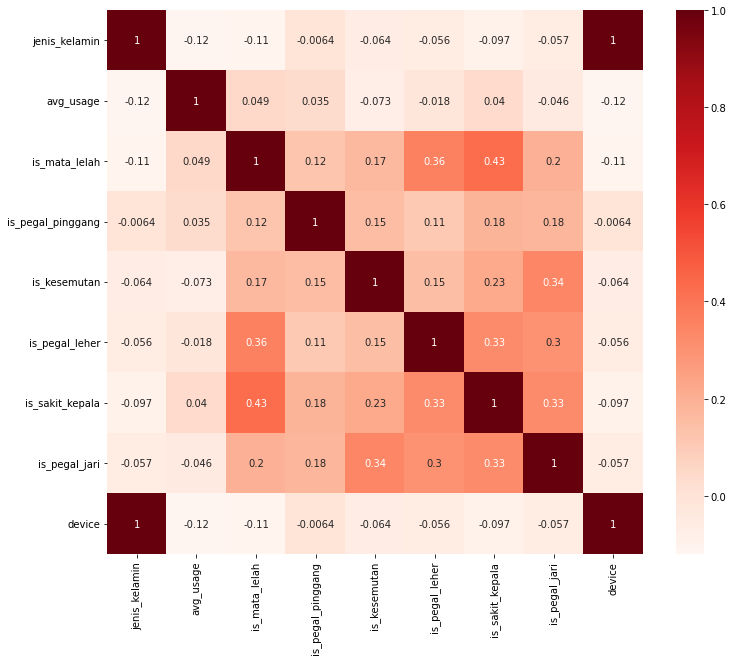

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
zoom_corr = x.corr()
plt.figure(figsize=(12,10))
sns.heatmap(zoom_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

###Detection Outlier Data

In [ ]:
device_corr = abs(zoom_corr['device'].drop(['device']))
device_corr

jenis_kelamin        1.000000
avg_usage            0.119833
is_mata_lelah        0.107084
is_pegal_pinggang    0.006402
is_kesemutan         0.063710
is_pegal_leher       0.055617
is_sakit_kepala      0.096633
is_pegal_jari        0.057496
Name: device, dtype: float64

In [ ]:
device_corr_index = device_corr[device_corr>0.5].index
device_reduction = zoom_standarded[device_corr_index]
device_reduction['device'] = new_data['device']
device_reduction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,jenis_kelamin,device
0,-0.502169,1
1,-0.502169,1
2,-0.502169,2
3,1.991361,2
4,-0.502169,2
...,...,...
283,1.991361,2
284,-0.502169,3
285,-0.502169,2
286,1.991361,2


In [ ]:
quantile = device_reduction.quantile([0.25, 0.75])
quantile = quantile.drop('device', axis=1)
quantile

,jenis_kelamin
0.25,-0.502169
0.75,-0.502169


In [ ]:
iqr = quantile.iloc[1]-quantile.iloc[0]
iqr

jenis_kelamin    0.0
dtype: float64

In [ ]:
quantile.loc[0.25] = quantile.loc[0.25]-iqr*1.5
quantile.loc[0.75] = quantile.loc[0.75]+iqr*1.5

lower = device_reduction['jenis_kelamin']<quantile.loc[0.25,'jenis_kelamin']
upper = device_reduction['jenis_kelamin']>quantile.loc[0.75,'jenis_kelamin']
device_reduction[(lower & upper)]

,jenis_kelamin,device


Tidak ditemukan data outlier

#Visualisasi Data

##Read the new Dataframe

In [ ]:
fix_zoom_data = zoom_duplicated_free.drop(['screen','with_desk','with_sofa','on_floor','lay_low','mobile','audio_device','limit'], axis=1)
fix_zoom_data

,jenis_kelamin,avg_usage,device,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,"5,5",Handphone,1,1,1,0,0,0
1,0,5,Handphone,1,0,1,1,1,0
2,0,9,Laptop,1,1,0,1,1,0
3,1,5,Laptop,0,1,0,0,0,0
4,0,2,Laptop,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
283,1,5,Laptop,1,1,0,1,1,0
284,0,5,Komputer Desktop,0,1,0,1,0,0
285,0,7,Laptop,1,1,0,1,1,1
286,1,4,Laptop,1,1,0,1,1,0


In [ ]:
fix_zoom_data['avg_usage'] = pd.to_numeric(fix_zoom_data['avg_usage'],errors='coerce')

In [ ]:
fix_zoom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jenis_kelamin      288 non-null    int64  
 1   avg_usage          214 non-null    float64
 2   device             288 non-null    object 
 3   is_mata_lelah      288 non-null    int64  
 4   is_pegal_pinggang  288 non-null    int64  
 5   is_kesemutan       288 non-null    int64  
 6   is_pegal_leher     288 non-null    int64  
 7   is_sakit_kepala    288 non-null    int64  
 8   is_pegal_jari      288 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 22.5+ KB


##Hitung jumlah responden berdasarkan gender

In [ ]:
sum_0 = fix_zoom_data.loc[fix_zoom_data.jenis_kelamin == 0, 'jenis_kelamin'].count()
sum_0

230

In [ ]:
sum_1 = fix_zoom_data.loc[fix_zoom_data.jenis_kelamin == 1, 'jenis_kelamin'].count()
sum_1

58

Laki - laki : 58

Perempuan : 230

Total Responden : 288

##Visualisasi 1. Rata-rata waktu online berdasarkan gender

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rata_rata = fix_zoom_data.groupby('jenis_kelamin')['avg_usage'].mean()
rata_rata

jenis_kelamin
0    6.305389
1    5.659574
Name: avg_usage, dtype: float64

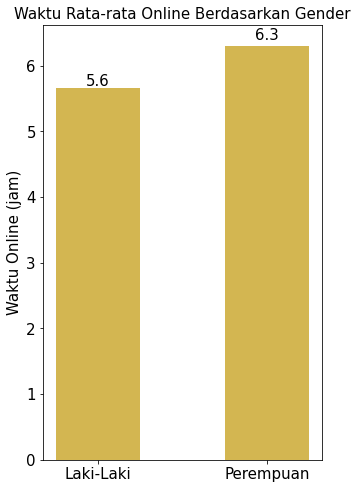

In [ ]:
menMeans = (5.6, 6.3)
avg_male = rata_rata[1]
avg_female = rata_rata[0]
data_dict = {'Laki-Laki':avg_male, 'Perempuan':avg_female}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig, ax = plt.subplots(figsize = (5,8))
# ax.bar(ind,menMeans,width)
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+0.1 , s=f"{data}" , fontdict=dict(fontsize=15), ha='center')

#  Bar plot
plt.bar(courses, values, color ='#D3B651', width = 0.5)
# plt.xlabel("Jenis Kelamin")
plt.ylabel("Waktu Online (jam)", fontsize=15)
plt.title("Waktu Rata-rata Online Berdasarkan Gender", fontsize=15)
plt.show()

##Visualisasi 2. Keluhan yang sering dialami mahasiswa (Umum)

In [ ]:
fix_zoom_data

,jenis_kelamin,avg_usage,device,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,NaN,Handphone,1,1,1,0,0,0
1,0,5.0,Handphone,1,0,1,1,1,0
2,0,9.0,Laptop,1,1,0,1,1,0
3,1,5.0,Laptop,0,1,0,0,0,0
4,0,2.0,Laptop,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
283,1,5.0,Laptop,1,1,0,1,1,0
284,0,5.0,Komputer Desktop,0,1,0,1,0,0
285,0,7.0,Laptop,1,1,0,1,1,1
286,1,4.0,Laptop,1,1,0,1,1,0


In [ ]:
code = 1
for i in fix_zoom_data.loc[:,'device'].unique():
  fix_zoom_data['device'].loc[fix_zoom_data['device']==i] = code
  code += 1
fix_zoom_data['device'] = fix_zoom_data['device'].astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
fix_zoom_data

,jenis_kelamin,avg_usage,device,is_mata_lelah,is_pegal_pinggang,is_kesemutan,is_pegal_leher,is_sakit_kepala,is_pegal_jari
0,0,NaN,1,1,1,1,0,0,0
1,0,5.0,1,1,0,1,1,1,0
2,0,9.0,2,1,1,0,1,1,0
3,1,5.0,2,0,1,0,0,0,0
4,0,2.0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
283,1,5.0,2,1,1,0,1,1,0
284,0,5.0,3,0,1,0,1,0,0
285,0,7.0,2,1,1,0,1,1,1
286,1,4.0,2,1,1,0,1,1,0


Device
- 1 : Handphone
- 2: Laptop
- 3 : Komputer Desktop	

In [ ]:
import seaborn as sns 
import matplotlib as mpl

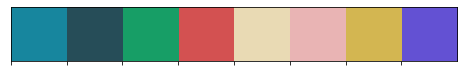

In [ ]:
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
sns.palplot(colors_mix)

In [ ]:
sum_mata_lelah = fix_zoom_data.loc[fix_zoom_data.is_mata_lelah == 1, 'is_mata_lelah'].count()
sum_pegal_pinggang = fix_zoom_data.loc[fix_zoom_data.is_pegal_pinggang == 1, 'is_pegal_pinggang'].count()
sum_kesemutan = fix_zoom_data.loc[fix_zoom_data.is_kesemutan == 1, 'is_kesemutan'].count()
sum_pegal_leher = fix_zoom_data.loc[fix_zoom_data.is_pegal_leher == 1, 'is_pegal_leher'].count()
sum_sakit_kepala = fix_zoom_data.loc[fix_zoom_data.is_sakit_kepala == 1, 'is_sakit_kepala'].count()
sum_pegal_jari = fix_zoom_data.loc[fix_zoom_data.is_pegal_jari == 1, 'is_pegal_jari'].count()

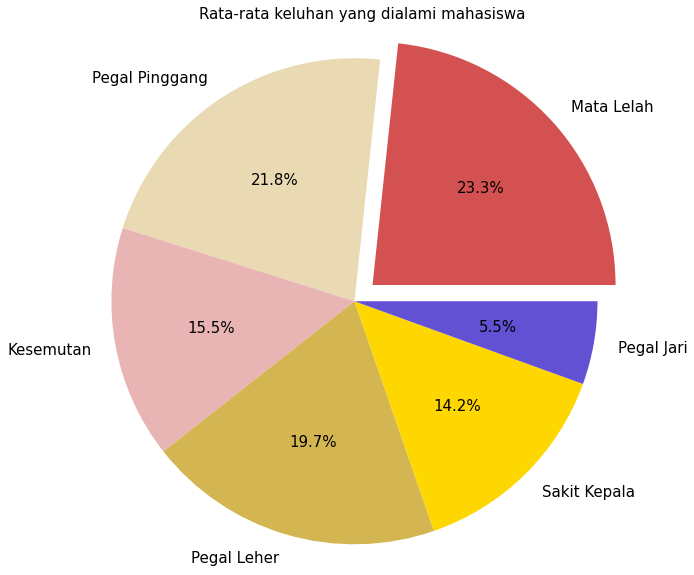

In [ ]:
labels = 'Mata Lelah', 'Pegal Pinggang', 'Kesemutan','Pegal Leher', 'Sakit Kepala', 'Pegal Jari'
sizes = [sum_mata_lelah, sum_pegal_pinggang, sum_kesemutan, sum_pegal_leher, sum_sakit_kepala, sum_pegal_jari]
colors = ['#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', 'gold','#6351D3']
explode = (0.1,0,0,0,0,0)

# plt.text(s="Keluhan yang dirasakan ketika melakukan perkuliahan daring", ha='center',x=0, y=1.4, fontsize=24, fontweight='bold', color='#264D58')
plt.title("Rata-rata keluhan yang dialami mahasiswa", fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.rcParams["figure.figsize"] = (10,10)
mpl.rcParams['font.size'] = 15.0
plt.show()

###Keluhan Berdasarkan device yang digunakan

In [ ]:
sum_device_mata_lelah = fix_zoom_data.groupby('device')['is_mata_lelah'].sum()
sum_device_mata_lelah

device
1     38
2    190
3      4
Name: is_mata_lelah, dtype: int64

In [ ]:
sum_device_pegal_pinggang = fix_zoom_data.groupby('device')['is_pegal_pinggang'].sum()
sum_device_kesemutan = fix_zoom_data.groupby('device')['is_kesemutan'].sum()
sum_device_pegal_leher = fix_zoom_data.groupby('device')['is_pegal_leher'].sum()
sum_device_sakit_kepala = fix_zoom_data.groupby('device')['is_sakit_kepala'].sum()
sum_device_pegal_jari = fix_zoom_data.groupby('device')['is_pegal_jari'].sum()

In [ ]:
sum_device_pegal_jari

device
1    12
2    43
3     0
Name: is_pegal_jari, dtype: int64

####**Visualisasi 2.1 Handphone**

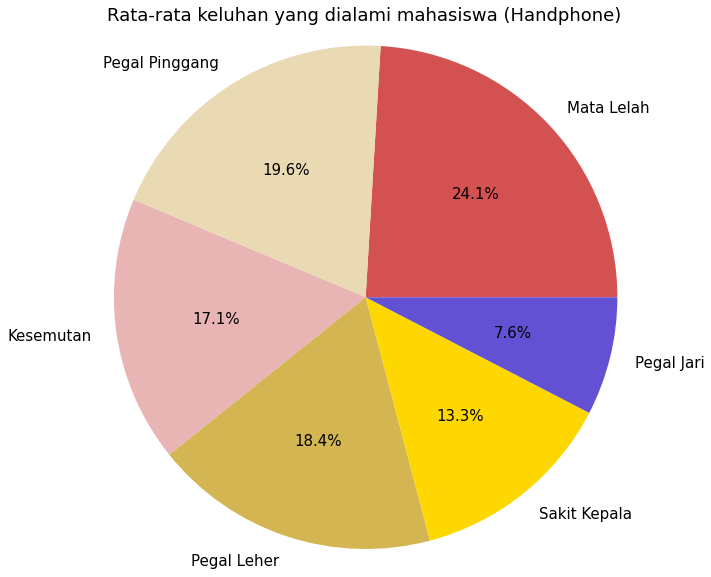

In [ ]:
labels = 'Mata Lelah', 'Pegal Pinggang', 'Kesemutan','Pegal Leher', 'Sakit Kepala', 'Pegal Jari'
sizes = [sum_device_mata_lelah[1], sum_device_pegal_pinggang[1], 
         sum_device_kesemutan[1], sum_device_pegal_leher[1], 
         sum_device_sakit_kepala[1], sum_device_pegal_jari[1]]
colors = ['#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', 'gold','#6351D3']
explode = (0,0,0,0,0,0)

plt.title("Rata-rata keluhan yang dialami mahasiswa (Handphone)")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

####**Visualisasi 2.2 Laptop**

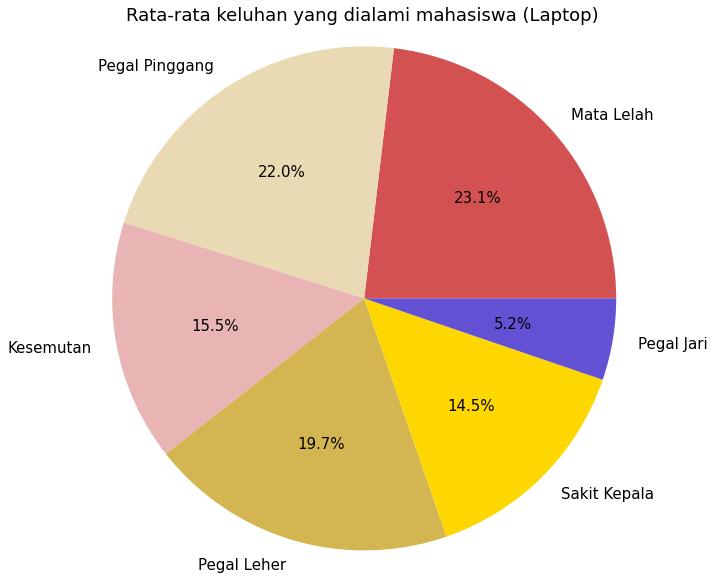

In [ ]:
labels = 'Mata Lelah', 'Pegal Pinggang', 'Kesemutan','Pegal Leher', 'Sakit Kepala', 'Pegal Jari'
sizes = [sum_device_mata_lelah[2], sum_device_pegal_pinggang[2], 
         sum_device_kesemutan[2], sum_device_pegal_leher[2], 
         sum_device_sakit_kepala[2], sum_device_pegal_jari[2]]
colors = ['#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', 'gold','#6351D3']
explode = (0,0,0,0,0,0)

plt.title("Rata-rata keluhan yang dialami mahasiswa (Laptop)")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

####**Visualisasi 2.3 Komputer Dekstop**

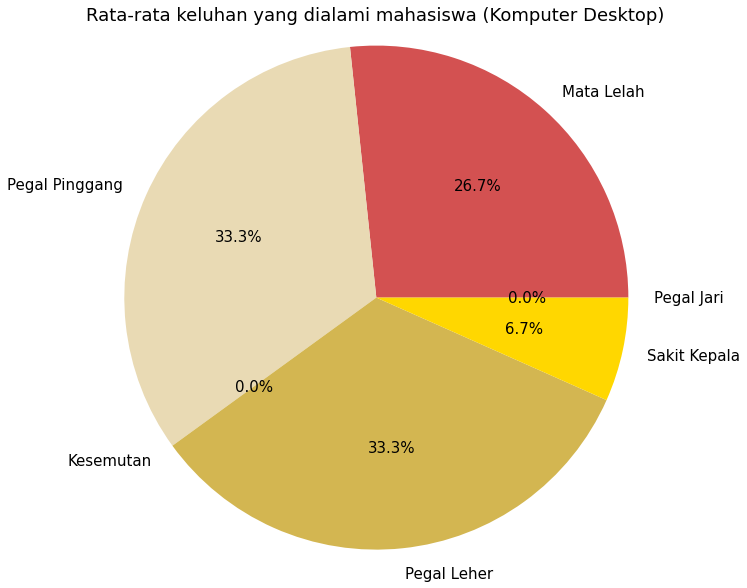

In [ ]:
labels = 'Mata Lelah', 'Pegal Pinggang', 'Kesemutan','Pegal Leher', 'Sakit Kepala', 'Pegal Jari'
sizes = [sum_device_mata_lelah[3], sum_device_pegal_pinggang[3], 
         sum_device_kesemutan[3], sum_device_pegal_leher[3], 
         sum_device_sakit_kepala[3], sum_device_pegal_jari[3]]
colors = ['#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', 'gold','#6351D3']
explode = (0,0,0,0,0,0)

plt.title("Rata-rata keluhan yang dialami mahasiswa (Komputer Desktop)")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

Rata-rata dari mahasiswa mengalami kelelahan pada mata, apapun device yang mereka gunakan, kecuali pada device 'Komputer Dekstop'

##Visualisasi 3. Hubungan Gender dengan Jumlah Keluhanyang dirasakan

In [ ]:
genders_mata_lelah = fix_zoom_data.groupby('jenis_kelamin')['is_mata_lelah'].sum()
genders_pegal_pinggang = fix_zoom_data.groupby('jenis_kelamin')['is_pegal_pinggang'].sum()
genders_kesemutan = fix_zoom_data.groupby('jenis_kelamin')['is_kesemutan'].sum()
genders_pegal_leher = fix_zoom_data.groupby('jenis_kelamin')['is_pegal_leher'].sum()
genders_sakit_kepala = fix_zoom_data.groupby('jenis_kelamin')['is_sakit_kepala'].sum()
genders_pegal_jari = fix_zoom_data.groupby('jenis_kelamin')['is_pegal_jari'].sum()

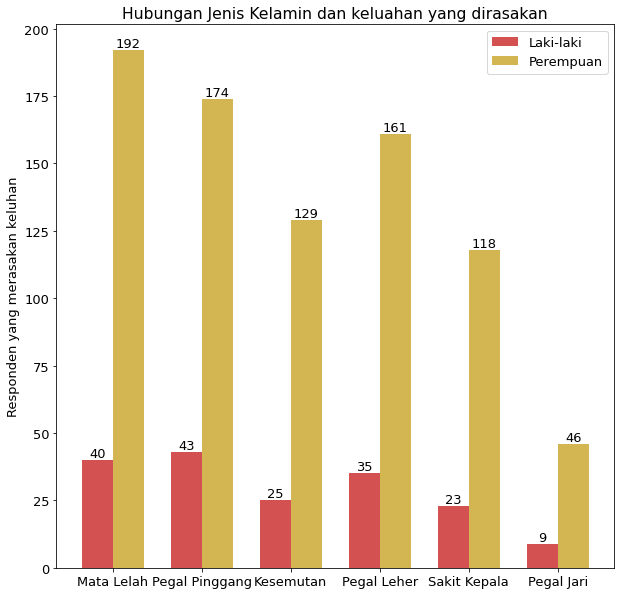

In [ ]:
N = 6
men_means = (genders_mata_lelah[1], genders_pegal_pinggang[1], 
             genders_kesemutan[1], genders_pegal_leher[1], 
             genders_sakit_kepala[1], genders_pegal_jari[1])

women_means = (genders_mata_lelah[0], genders_pegal_pinggang[0], 
             genders_kesemutan[0], genders_pegal_leher[0], 
             genders_sakit_kepala[0], genders_pegal_jari[0])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color=colors_mix[3])
rects2 = ax.bar(ind + width, women_means, width, color=colors_mix[6])

ax.set_ylabel('Responden yang merasakan keluhan')
ax.set_title('Hubungan Jenis Kelamin dan keluahan yang dirasakan')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Mata Lelah', 'Pegal Pinggang', 'Kesemutan','Pegal Leher', 'Sakit Kepala', 'Pegal Jari'))

ax.legend((rects1[0], rects2[0]), ('Laki-laki', 'Perempuan'))


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')
mpl.rcParams['font.size'] = 13.0

autolabel(rects1)
autolabel(rects2)

plt.show()